In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#from dataPath import DATA_PATH
#from dataPath import MODEL_PATH
%matplotlib inline

In [21]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [24]:
MODEL_PATH = 'models/'
modelFile = MODEL_PATH + "ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb"
configFile = MODEL_PATH + "ssd_mobilenet_v2_coco_2018_03_29.pbtxt"
classFile = MODEL_PATH + "coco_class_labels.txt"

In [25]:
# Read the Tensorflow network
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

In [26]:
with open(classFile) as fp:
    labels = fp.read().split("\n")


In [27]:
# For ach file in the directory
def detect_objects(net, im):
    # Blob dimension (dim x dim)
    dim = 300

    mean = (127.5, 127.5, 127.5)
    
    # The blobFromImage functions will use True for swapRB flag. 
    # This is because Tensorflow uses RGB format whereas Caffe and OpenCV use BGR format.
    swap_rgb = True
    
    # Create a blob from the image
    blob = cv2.dnn.blobFromImage(im, 1.0/127.5, (dim, dim), mean, swap_rgb)
    

    # Pass blob to the network
    net.setInput(blob)
    
    # Peform Prediction
    objects = net.forward()
    return objects


In [28]:
def display_text(im, text, x, y):
    
    # Get text size 
    textSize = cv2.getTextSize(text, FONTFACE, FONT_SCALE, THICKNESS)
    dim = textSize[0]
    baseline = textSize[1]
            
    # Use text size to create a black rectangle    
    cv2.rectangle(im, (x,y-dim[1] - baseline), (x + dim[0], y + baseline), (0,0,0), cv2.FILLED);
    # Display text inside the rectangle
    cv2.putText(im, text, (x, y-5 ), FONTFACE, FONT_SCALE, (0, 255, 255), THICKNESS, cv2.LINE_AA)


In [29]:
FONTFACE = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.7
THICKNESS = 1

def display_objects(im, objects, threshold = 0.25):

    rows = im.shape[0]; cols = im.shape[1]

    # For every Detected Object
    for i in range(objects.shape[2]):
        # Find the class and confidence 
        classId = int(objects[0, 0, i, 1])
        score = float(objects[0, 0, i, 2])
        
        # Recover original cordinates from normalized coordinates
        x = int(objects[0, 0, i, 3] * cols)
        y = int(objects[0, 0, i, 4] * rows)
        w = int(objects[0, 0, i, 5] * cols - x)
        h = int(objects[0, 0, i, 6] * rows - y)
        
        # Check if the detection is of good quality
        if score > threshold:
            display_text(im, "{}".format(labels[classId]), x, y)
            cv2.rectangle(im, (x, y), (x + w, y + h), (255, 255, 255), 2)
    
    # Convert Image to RGB since we are using Matplotlib for displaying image
    mp_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(30,10)); plt.imshow(mp_img); plt.show();

In [30]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El número de serie del volumen es: 3879-7E8D

 Directorio de C:\Users\Pablo\Desktop\STRIVE AI\Strive_course\Chapter 3-DL\06. Computational vision\DAY 3

25/11/2021  15:40    <DIR>          .
25/11/2021  15:40    <DIR>          ..
25/11/2021  15:05    <DIR>          .ipynb_checkpoints
25/11/2021  10:03            38.727 coins.jpg
25/11/2021  15:38            13.864 DL_Object_Detection.ipynb
25/11/2021  10:42            26.112 hand.jpg
25/11/2021  15:40    <DIR>          models
25/11/2021  15:39            12.854 street.jpg
               4 archivos         91.557 bytes
               4 dirs   1.844.133.888 bytes libres


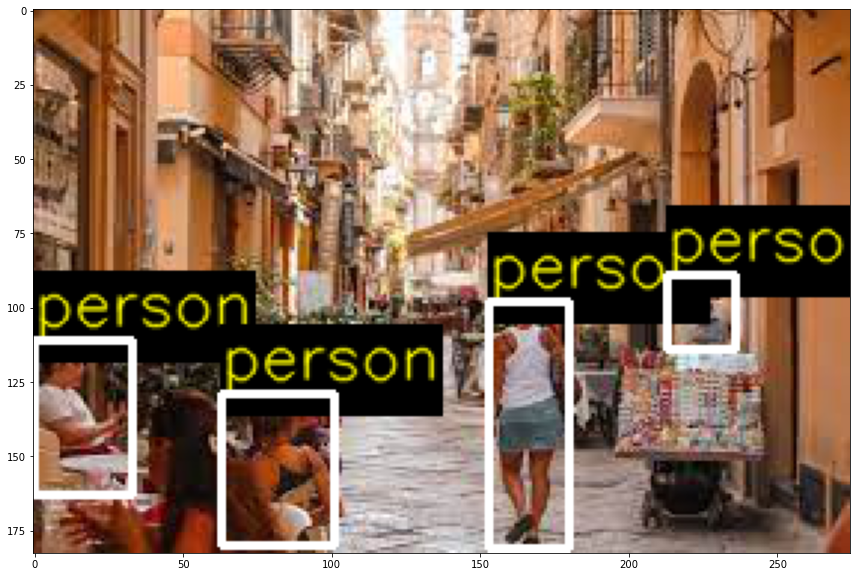

In [32]:
im = cv2.imread('street.jpg')
objects = detect_objects(net, im)
display_objects(im, objects)

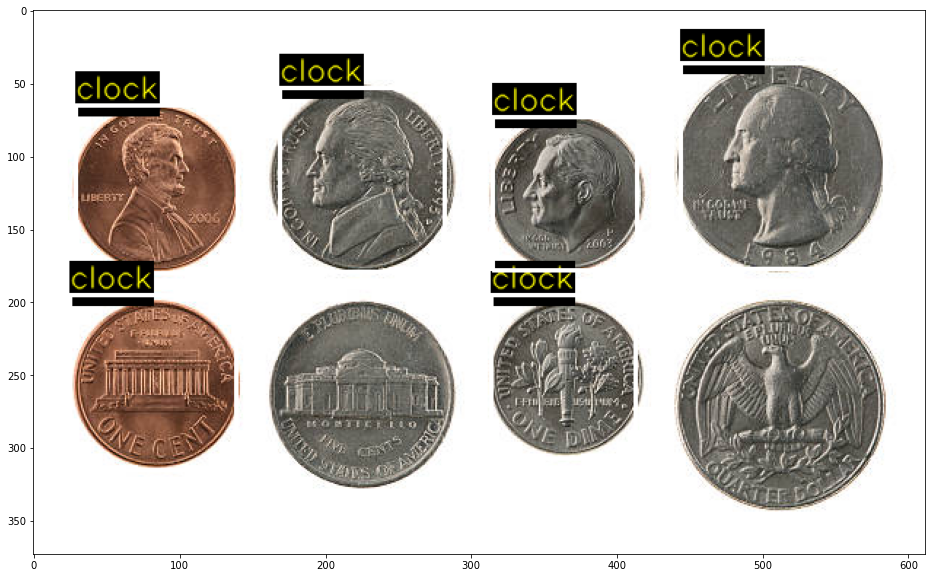

In [34]:
#THIS MODEL IS NOT TRAINED IN COINS, SO HE CLASSIFY THEM AS THE MOST SIMILAR OBJECT
im = cv2.imread('coins.jpg')
objects = detect_objects(net, im)
display_objects(im, objects, 0.2)

In [38]:
sorted(labels)

['',
 'airplane',
 'apple',
 'backpack',
 'banana',
 'baseball bat',
 'baseball glove',
 'bear',
 'bed',
 'bench',
 'bicycle',
 'bird',
 'blender',
 'boat',
 'book',
 'bottle',
 'bowl',
 'broccoli',
 'bus',
 'cake',
 'car',
 'carrot',
 'cat',
 'cell phone',
 'chair',
 'clock',
 'couch',
 'cow',
 'cup',
 'desk',
 'dining table',
 'dog',
 'donut',
 'door',
 'elephant',
 'eye glasses',
 'fire hydrant',
 'fork',
 'frisbee',
 'giraffe',
 'hair brush',
 'hair drier',
 'handbag',
 'hat',
 'horse',
 'hot dog',
 'keyboard',
 'kite',
 'knife',
 'laptop',
 'microwave',
 'mirror',
 'motorcycle',
 'mouse',
 'orange',
 'oven',
 'parking meter',
 'person',
 'pizza',
 'plate',
 'potted plant',
 'refrigerator',
 'remote',
 'sandwich',
 'scissors',
 'sheep',
 'shoe',
 'sink',
 'skateboard',
 'skis',
 'snowboard',
 'spoon',
 'sports ball',
 'stop sign',
 'street sign',
 'suitcase',
 'surfboard',
 'teddy bear',
 'tennis racket',
 'tie',
 'toaster',
 'toilet',
 'toothbrush',
 'traffic light',
 'train',
 't

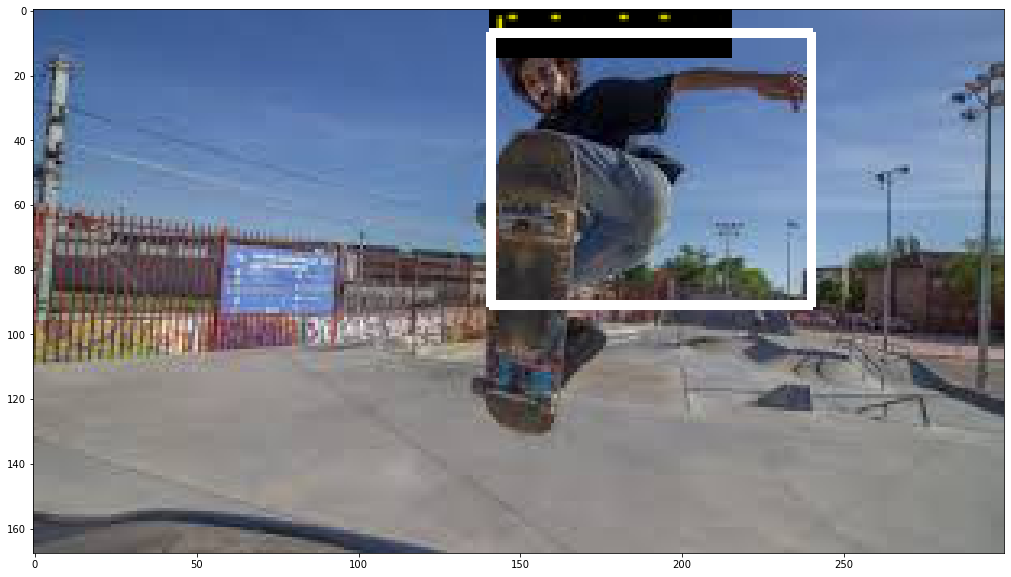

In [40]:
im = cv2.imread('skate.jpg')
objects = detect_objects(net, im)
display_objects(im, objects)